# Base model

In [1]:
import json
import warnings

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

warnings.filterwarnings("ignore")

/Users/davidtruhlar/Documents/FIIT/BP/5GDigitalTwin/Implementation/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Global variables
BATCH_SIZE = 128
EPOCHS = 100

In [3]:
# Get the class weights from a JSON file
with open('./json/class_weights.json', "r") as f:
    class_weight_dict = json.load(f)

In [4]:
# Preprocessed data
X_train = np.load('preprocessed_data/X_train.npy')
y_train = np.load('preprocessed_data/y_train.npy')
X_test = np.load('preprocessed_data/X_test.npy')
y_test = np.load('preprocessed_data/y_test.npy')

In [5]:
# Transform the y_train and y_test labels to categorical
y_train_cat = to_categorical(y_train, num_classes=len(np.unique(y_train)))
y_test_cat = to_categorical(y_test, num_classes=len(np.unique(y_train)))

In [6]:
# Model definition
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(60, X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))

In [7]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [8]:
# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [9]:
# Train the model
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    class_weight=class_weight_dict,
    callbacks=[early_stop]
)

Epoch 1/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.4887 - loss: 1.3017 - val_accuracy: 0.6558 - val_loss: 0.9047
Epoch 2/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.6545 - loss: 0.8820 - val_accuracy: 0.6908 - val_loss: 0.7812
Epoch 3/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.6819 - loss: 0.7944 - val_accuracy: 0.7007 - val_loss: 0.7452
Epoch 4/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.7010 - loss: 0.7619 - val_accuracy: 0.7146 - val_loss: 0.6969
Epoch 5/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.7209 - loss: 0.7103 - val_accuracy: 0.7509 - val_loss: 0.6467
Epoch 6/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.7347 - loss: 0.6705 - val_accuracy: 0.7406 - val_loss: 0.6360
Epoch 7/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.7485 - loss: 0.6334 - val_accuracy: 0.7553 - val_loss: 0.6276
Epoch 8/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.7596 - loss: 0.6021 -

274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


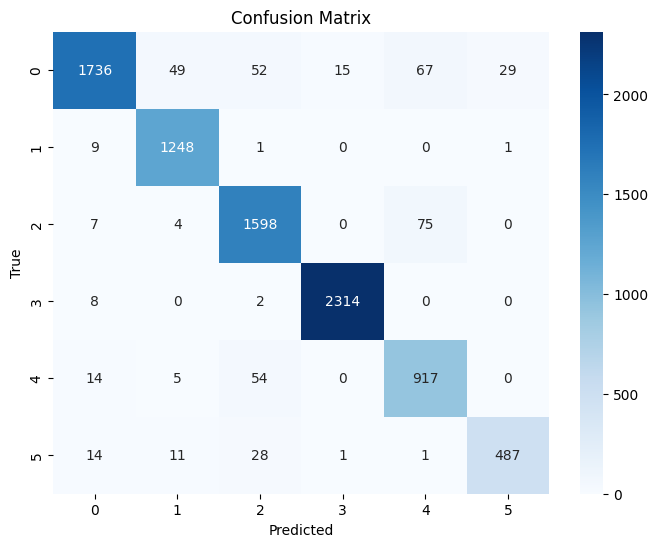

In [10]:
# Predictions
y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [11]:
# Classification report
print(classification_report(y_true, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.971     0.891     0.929      1948
           1      0.948     0.991     0.969      1259
           2      0.921     0.949     0.935      1684
           3      0.993     0.996     0.994      2324
           4      0.865     0.926     0.895       990
           5      0.942     0.899     0.920       542

    accuracy                          0.949      8747
   macro avg      0.940     0.942     0.940      8747
weighted avg      0.950     0.949     0.949      8747



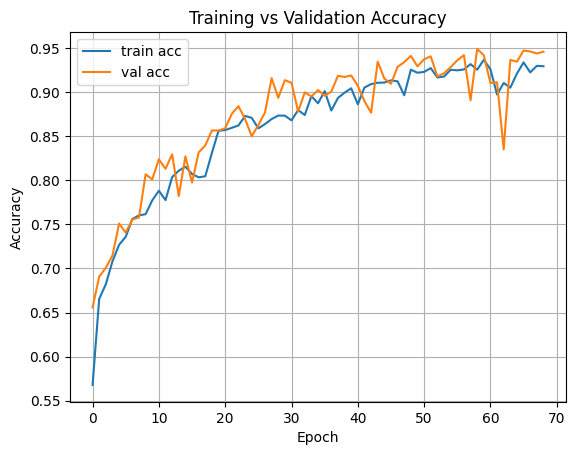

In [12]:
# Plot the training history
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Save the model
model.save('trained_models/lstm_base_model.h5')
model.save('trained_models/lstm_base_model.keras')